# Gender and Corporate Stress
The goal of this notebook is to see if there is a relationship between gender and corporate stress. The main questions we are tackling are: "Which gender is experiencing corporate stress the most?" and "Does experiencing gender bias contribute to increased stress?"
### Background
These question are based off of data we have found on corporate stress and possible related factors gathered in India. 

### Analysis
The first box plot created visualizes the distribution of the stress level experienced by male, female, and non-binary individuals. The box plot very clearly shows a uniform distribution of the stress levels for each of the genders, which signals the possibility of the data being synthetic.

The second box plot displays the distribution of stress level experienced by individuals who have indicated they have experienced gender bias and those who indicated they have not experienced gender bias. The box plot also visualizes a uniform distribution of the stress level by each group.

The final visual is a pie chart illustrating the percentage distribution of each gender among individuals who reported they have experienced gender bias.

After analyzing the visuals that we have created based off of the data, we have concluded that the dataset used is highly likely to be synthetic.

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
#%matplotlib widget
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np

In [17]:
corporate_stress_data = Path("corporate_stress_dataset.csv")
corporate_stress_df = pd.read_csv(corporate_stress_data)
corporate_stress_df.head()

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,...,9,2,5,10,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,...,9,1,10,9,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,...,6,1,1,1,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,...,8,10,5,10,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,...,3,1,9,2,85,True,False,False,No,Tier-1


In [18]:
gender_stress_df = corporate_stress_df.loc[:,["Gender","Gender_Bias_Experienced","Stress_Level"]].copy()
gender_stress_df

,Gender,Gender_Bias_Experienced,Stress_Level
0,Non-Binary,True,0
1,Female,True,7
2,Female,False,7
3,Female,True,6
4,Male,False,8
...,...,...,...
49995,Female,True,0
49996,Male,True,1
49997,Female,True,6
49998,Male,False,4


# Stress Level by Gender

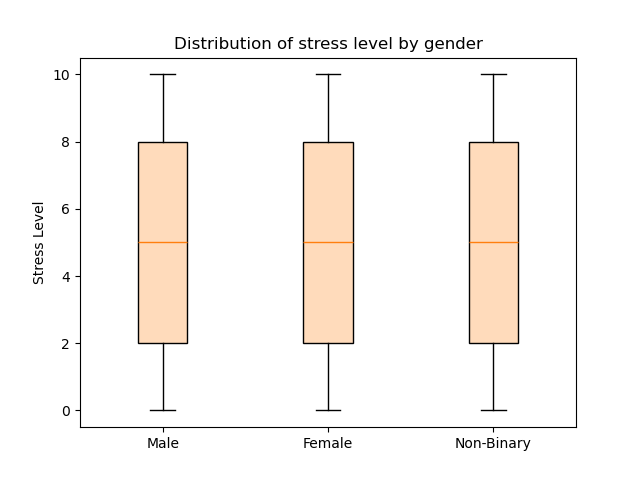

In [ ]:
figure = plt.figure()

male_stress_lvl = gender_stress_df.loc[gender_stress_df["Gender"] == "Male"]["Stress_Level"].copy()
female_stress_lvl = gender_stress_df.loc[gender_stress_df["Gender"] == "Female"]["Stress_Level"].copy()
nb_stress_lvl = gender_stress_df.loc[gender_stress_df["Gender"] == "Non-Binary"]["Stress_Level"].copy()

stress_lvl_groups = [male_stress_lvl,female_stress_lvl,nb_stress_lvl]
bp1 = plt.boxplot(stress_lvl_groups,patch_artist=True)
for box in bp1['boxes']:
    box.set(facecolor="#FFDBBB")
plt.title("Distribution of stress level by gender")
plt.ylabel("Stress Level")
tick_locations = [value+1 for value in np.arange(len(stress_lvl_groups))]
plt.xticks(tick_locations, labels=["Male", "Female", "Non-Binary"])
plt.show()
#figure.savefig('stress_lvl_by_gender.png')

# Experience of Gender Bias by Gender

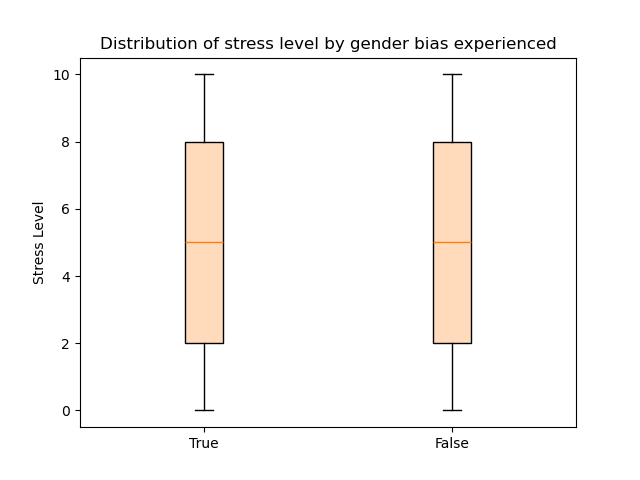

In [ ]:
# gender_bias_group = gender_stress_df.groupby(["Gender_Bias_Experienced"]).count()
# gender_stress_df.boxplot("Stress_Level",by="Gender_Bias_Experienced", figsize=(10,5))
true_bias_exp = gender_stress_df.loc[gender_stress_df["Gender_Bias_Experienced"] == True]["Stress_Level"].copy()
false_bias_exp = gender_stress_df.loc[gender_stress_df["Gender_Bias_Experienced"] == False]["Stress_Level"].copy()

bias_exp_groups = [true_bias_exp, false_bias_exp]
figure2 = plt.figure()
bp2 = plt.boxplot(bias_exp_groups,patch_artist=True)
for box in bp2['boxes']:
    box.set(facecolor="#FFDBBB")
plt.title("Distribution of stress level by gender bias experienced")
plt.ylabel("Stress Level")
tick_locations = [value+1 for value in np.arange(len(bias_exp_groups))]
plt.xticks(tick_locations, labels=["True", "False"])
plt.show()
#figure2.savefig('stress_lvl_by_gender_bias_exp.png')

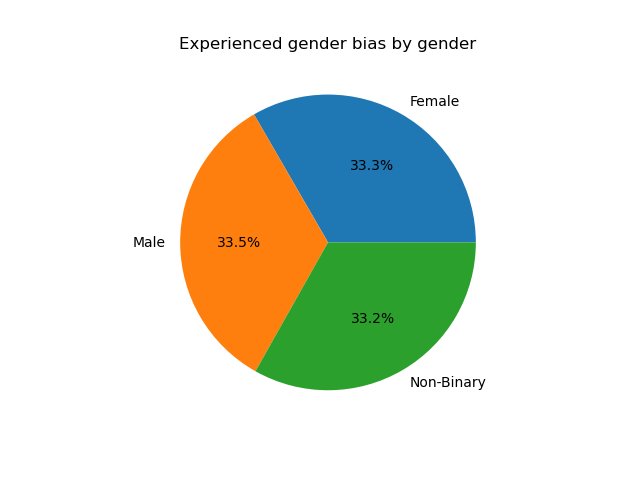

In [ ]:
fig3 = plt.figure()
gender_bias_true = gender_stress_df.loc[gender_stress_df["Gender_Bias_Experienced"] == True]
gender_bias_group = gender_bias_true.groupby("Gender")["Stress_Level"].count()
labels = gender_bias_group.index.tolist()
plt.pie(gender_bias_group,labels=labels,autopct='%1.1f%%')
plt.title("Experienced gender bias by gender")
#fig3.savefig('Experienced gender bias by gender')